# **NLP Mini Project: Relationship Extraction and Visualization on Harray potter books**

### **1. Importing the necessary libraries**

In [40]:
import re
import os
import nltk
import spacy
import string
import time
import logging
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd
from spacy import displacy
from selenium import webdriver
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords 
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

%matplotlib inline
sns.set_style('darkgrid')

### **2. Scraping the list of characters in the HP books**

In [6]:
webdriver_service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service = webdriver_service)

page_url = 'https://fantasytopics.com/harry-potter-characters-list/'
driver.get(page_url)

In [76]:
names_list = driver.find_elements(by=By.CLASS_NAME, value='has-text-align-center')
final_names = []

for name in names_list:
    if len(name.text)>1:
        final_names.append(name.text)

In [83]:
character_df = pd.DataFrame(final_names)
character_df.to_csv('characters.csv')
character_df.head()

,0
0,Hannah Abbott
1,Aragog
2,Ludo Bagman
3,Bathilda Bagshot
4,Bane (Centaur)


### **3. Exploratory Data Analysis**

In [48]:
Bookfile = [] 

# Loops through importing 7 HP text files - Book 1 creates table, Books 2-7 append to Book 1 table
for i in range(1,8): 
    Bookfile.append('HPBook'+str(i)+'.txt')
    FileLoc = "C://Users/aseem/Downloads/Final Year/NLP/Harry-Potter/Book_Text/{}".format(Bookfile[i-1])
    if i == 1:
        df = pd.read_csv(FileLoc, sep="@")
    else:
        df2 = pd.read_csv(FileLoc, sep="@")
        df = pd.concat([df, df2])

In [49]:
nltk.download('punkt') 
stopwords = set(stopwords.words('english')) 

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aseem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
df['WordCountText'] = df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

df.reset_index()

,index,Text,Chapter,Book,WordCountText,WordCount
0,0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",1,1,"[the, boy, who, lived, mr, and, mrs, dursley, ...",4591
1,1,THE VANISHING GLASS Nearly ten years had pass...,2,1,"[the, vanishing, glass, nearly, ten, years, ha...",3445
2,2,THE LETTERS FROM NO ONE The escape of the Bra...,3,1,"[the, letters, from, no, one, the, escape, of,...",3842
3,3,THE KEEPER OF THE KEYS BOOM. They knocked aga...,4,1,"[the, keeper, of, the, keys, boom, they, knock...",3690
4,4,DIAGON ALLEY Harry woke early the next mornin...,5,1,"[diagon, alley, harry, woke, early, the, next,...",6570
...,...,...,...,...,...,...
195,32,"Harry remained kneeling at Snape's side, simpl...",33,7,"[harry, remained, kneeling, at, snapes, side, ...",7930
196,33,"Finally, the truth. Lying with his face presse...",34,7,"[finally, the, truth, lying, with, his, face, ...",3762
197,34,"He lay facedown, listening to the silence. He ...",35,7,"[he, lay, facedown, listening, to, the, silenc...",4846
198,35,He was flying facedown on the ground again. Th...,36,7,"[he, was, flying, facedown, on, the, ground, a...",6943


C:\Users\aseem\anaconda3\envs\cal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

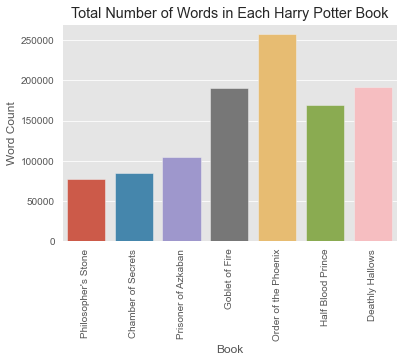

<Figure size 1440x720 with 0 Axes>

In [51]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].sum().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].sum().reset_index()['WordCount']
x_pos = np.arange(len(x))
sns.barplot(x_pos, y)
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Total Number of Words in Each Harry Potter Book")
plt.xticks(x_pos, BookTitles, rotation=90)
plt.figure(figsize=(20,10))

C:\Users\aseem\anaconda3\envs\cal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x2830bb68fd0>,
 [Text(0, 0, "Philosopher's Stone"),
  Text(1, 0, 'Chamber of Secrets'),
  Text(2, 0, 'Prisoner of Azkaban'),
  Text(3, 0, 'Goblet of Fire'),
  Text(4, 0, 'Order of the Phoenix'),
  Text(5, 0, 'Half Blood Prince'),
  Text(6, 0, 'Deathly Hallows')])

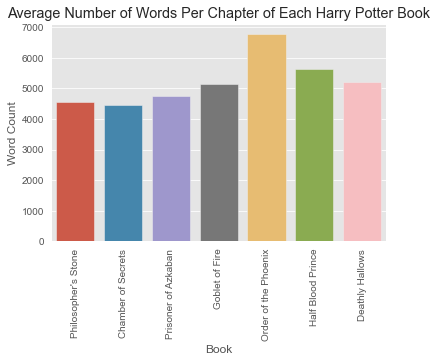

In [52]:
x = df.groupby(['Book'])['WordCount'].mean().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].mean().reset_index()['WordCount']
x_pos = np.arange(len(x))
plt.style.use('ggplot')
sns.barplot(x_pos, y)
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Average Number of Words Per Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles, rotation=90)

### **4. Using NER**

In [3]:
NER = spacy.load("en_core_web_sm")
all_books = [b for b in os.scandir('Harry-Potter/Book_Text') if '.txt' in b.name]

In [4]:
all_books

[<DirEntry 'HPBook1.txt'>,
 <DirEntry 'HPBook2.txt'>,
 <DirEntry 'HPBook3.txt'>,
 <DirEntry 'HPBook4.txt'>,
 <DirEntry 'HPBook5.txt'>,
 <DirEntry 'HPBook6.txt'>,
 <DirEntry 'HPBook7.txt'>]

In [6]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [92]:
displacy.render(book_doc[0:500], style="ent", jupyter=True)

### **5. Prepping the Characters**

In [121]:
character_df = pd.read_csv("characters.csv")
character_df.rename(columns = {'0':'characters'}, inplace = True)
character_df.head()

,Unnamed: 0,characters
0,0,Hannah Abbott
1,1,Aragog
2,2,Ludo Bagman
3,3,Bathilda Bagshot
4,4,Bane (Centaur)


In [122]:
character_df['characters'] = character_df['characters'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['characters'].apply(lambda x: x.split(' ', 1)[0])
character_df = character_df[["characters", "character_firstname"]]
character_df.head(10)

,characters,character_firstname
0,Hannah Abbott,Hannah
1,Aragog,Aragog
2,Ludo Bagman,Ludo
3,Bathilda Bagshot,Bathilda
4,Bane,Bane
...,...,...
191,Ron Weasley,Ron
192,Winky,Winky
193,Oliver Wood,Oliver
194,Corban Yaxley,Corban


### **6. Extracting and Filtering Entities**

In [123]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [1]:
sent_entity_df

NameError: name 'sent_entity_df' is not defined